## Loading packages

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## Input data (Waves)

In [2]:
wave_a_still = 64
wave_a_hog_global = -8
wave_a_sag_global = 4
wave_a_hog_local = -12 
wave_a_sag_local = 5
wave_a_cycles_exper = 3e7

wave_b_still = -45
wave_b_hog_global = -20
wave_b_sag_global = 22
wave_b_hog_local = -10
wave_b_sag_local = 13
wave_b_cycles_exper = 5e5

wave_c_still = 64
wave_c_hog_global = -20
wave_c_sag_global = 15
wave_c_hog_local = -6
wave_c_sag_local = 12
wave_c_cycles_exper = 1e6

wave_d_still = -45
wave_d_hog_global = -5
wave_d_sag_global = 3
wave_d_hog_local = -3
wave_d_sag_local = 10
wave_d_cycles_exper = 1e7

wave_e_still = 64
wave_e_hog_global = -24
wave_e_sag_global = 10
wave_e_hog_local = -25
wave_e_sag_local = 15
wave_e_cycles_exper = 5e4

wave_f_still = -45
wave_f_hog_global = -5
wave_f_sag_global = 8
wave_f_hog_local = -3
wave_f_sag_local = 4
wave_f_cycles_exper = 1e7

### Redefinition of input data for computation in loops
n_waves = 6
still = np.zeros(n_waves)
still = [wave_a_still, wave_b_still, wave_c_still, wave_d_still, wave_e_still, wave_f_still]
hog_global = np.zeros(n_waves)
hog_global = [wave_a_hog_global, wave_b_hog_global, wave_c_hog_global, wave_d_hog_global, wave_e_hog_global, wave_f_hog_global]
sag_global = np.zeros(n_waves)
sag_global = [wave_a_sag_global, wave_b_sag_global, wave_c_sag_global, wave_d_sag_global, wave_e_sag_global, wave_f_sag_global]
hog_local = np.zeros(n_waves)
hog_local = [wave_a_hog_local, wave_b_hog_local, wave_c_hog_local, wave_d_hog_local, wave_e_hog_local, wave_f_hog_local]
sag_local = np.zeros(n_waves)
sag_local = [wave_a_sag_local, wave_b_sag_local, wave_c_sag_local, wave_d_sag_local, wave_e_sag_local, wave_f_sag_local]
cycles_exper = np.zeros(n_waves)
cycles_exper = [wave_a_cycles_exper, wave_b_cycles_exper, wave_c_cycles_exper, wave_d_cycles_exper, wave_e_cycles_exper, wave_f_cycles_exper]

cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Structural connection 

In [3]:
fat_class = 71
knuckle_stress = 41.52 
log_k1 = 11.855
m1 = 3
log_k2 = 15.091
m2 = 5

# Yielding check

Wave 0 (hogging):   44.0 MPa
Wave 1 (hogging):   -75.0 MPa
Wave 2 (hogging):   38.0 MPa
Wave 3 (hogging):   -53.0 MPa
Wave 4 (hogging):   15.0 MPa
Wave 5 (hogging):   -53.0 MPa
Wave 0 (sagging):   73.0 MPa
Wave 1 (sagging):   -10.0 MPa
Wave 2 (sagging):   91.0 MPa
Wave 3 (sagging):   -32.0 MPa
Wave 4 (sagging):   89.0 MPa
Wave 5 (sagging):   -33.0 MPa


<IPython.core.display.Javascript object>


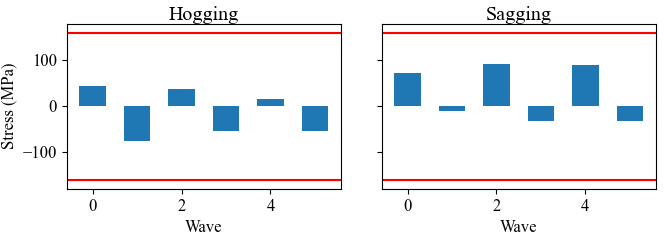

In [4]:
wave_hog = np.zeros(6)
for i in range(6):
    wave_hog[i] = still[i] + hog_global[i] + hog_local[i]
    print('Wave', i, '(hogging):  ', wave_hog[i], 'MPa')

wave_sag = np.zeros(6)
for i in range(6):
    wave_sag[i] = still[i] + sag_global[i] + sag_local[i]
    print('Wave', i, '(sagging):  ', wave_sag[i], 'MPa')
    
width = 0.6
xpos = np.arange(6)
fig, ax = plt.subplots(1, 2, figsize=(17*cm, 6*cm), sharey='row')
ax[0].set_title('Hogging', pad=1)
ax[0].bar(xpos, wave_hog, width)
ax[0].axhline(y = 160, color='r')
ax[0].axhline(y = -160, color='r')
ax[0].set_ylim(-180, +180)
ax[0].set_xlabel('Wave')
ax[0].set_ylabel('Stress (MPa)')
ax[1].set_title('Sagging', pad=0.5)
ax[1].bar(xpos, wave_sag, width)
ax[1].axhline(y = 160, color='r')
ax[1].axhline(y = -160, color='r')
ax[1].set_ylim(-180, +180)
ax[1].set_xlabel('Wave')
plt.subplots_adjust(left=0.10, right=.98, top=0.90, bottom=0.20, hspace = 0.65, wspace=0.15)
plt.show()

# Fatigue loads

Wave 0 (hogging):   29.0 MPa
Wave 1 (hogging):   65.0 MPa
Wave 2 (hogging):   53.0 MPa
Wave 3 (hogging):   21.0 MPa
Wave 4 (hogging):   74.0 MPa
Wave 5 (hogging):   20.0 MPa


<IPython.core.display.Javascript object>


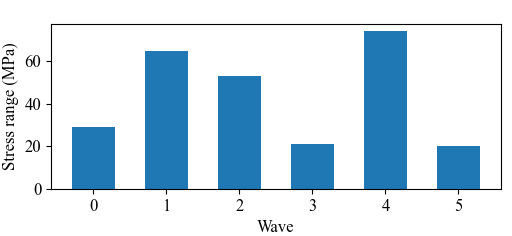

In [5]:
wave_stress_range = np.zeros(6)
for i in range(6):
    wave_stress_range[i] = abs(wave_hog[i] - wave_sag[i])
    print('Wave', i, '(hogging):  ', wave_stress_range[i], 'MPa')
    
width = 0.6
xpos = np.arange(6)
fig, ax = plt.subplots(1, figsize=(13*cm, 6*cm))
ax.bar(xpos, wave_stress_range, width)
ax.set_xlabel('Wave')
ax.set_ylabel('Stress range (MPa)')
plt.subplots_adjust(left=0.10, right=.98, top=0.90, bottom=0.20, hspace = 0.65, wspace=0.15)
plt.show()

## Get cycles to failure 

In [6]:
def get_cycles_fail(stress_range, knuckle_stress, log_k1, log_k2, m1, m2):
    if stress_range >= knuckle_stress:
        cycles_fail = 10**(log_k1)*stress_range**(-m1)
        #print(log_k1)
    else:
        cycles_fail = 10**(log_k2)*stress_range**(-m2)
        #print(log_k2)
    return cycles_fail 

## Cycles to failure (N)

Wave 0 (N):   60.11875947217326 million cycles
Wave 1 (N):   2.6077138287224493 million cycles
Wave 2 (N):   4.81030253305012 million cycles
Wave 3 (N):   301.92809463549185 million cycles
Wave 4 (N):   1.7672778764656158 million cycles
Wave 5 (N):   385.34526038403345 million cycles


<IPython.core.display.Javascript object>


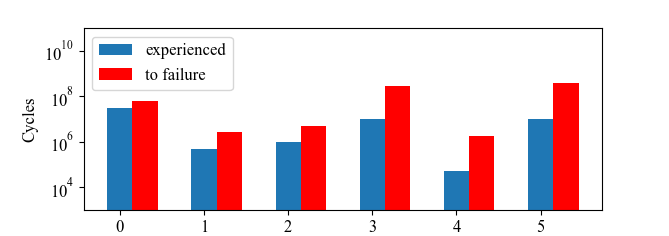

In [7]:
wave_N = np.zeros(6)
for i in range(6):
    wave_N[i] = get_cycles_fail(wave_stress_range[i], knuckle_stress, log_k1, log_k2, m1, m2)
    print('Wave', i, '(N):  ', wave_N[i]/1e6, 'million cycles')
    
cycles = np.array([cycles_exper, wave_N])
width = 0.3
xpos = np.arange(6)
fig, ax = plt.subplots(1, figsize=(17*cm, 6*cm))
ax.bar(xpos + 0.00, cycles[0], width, label='experienced')
ax.bar(xpos + 0.30, cycles[1], width, color='red', label='to failure')
ax.set_xlabel('Wave')
ax.set_ylabel('Cycles')
ax.set_ylim(1e3, 1e11)
ax.set_yscale('log')
ax.legend(labels=['experienced', 'to failure'], loc=2)
plt.show()

## Fatigue damage (Miner's rule)

Wave 0 (D):   0.49901229272513326
Wave 1 (D):   0.19173883057749325
Wave 2 (D):   0.20788713248892463
Wave 3 (D):   0.03312046867341935
Wave 4 (D):   0.028292098637026537
Wave 5 (D):   0.025950753851322946

Total damage: 0.9860015769533199
Fatigue life: 25.354929022779412 years


<IPython.core.display.Javascript object>


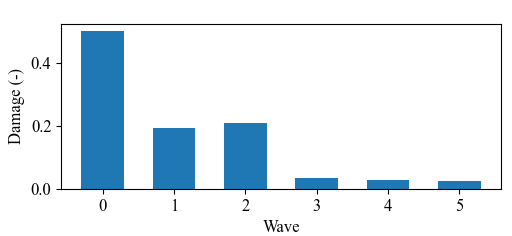

In [8]:
wave_D = np.zeros(6)
for i in range(6):
    wave_D[i] = cycles_exper[i] / wave_N[i]
    print('Wave', i, '(D):  ', wave_D[i])

total_damage = np.sum(wave_D)
print('')
print('Total damage:', total_damage)
print('Fatigue life:', 25/total_damage, 'years')

width = 0.6
xpos = np.arange(6)
fig, ax = plt.subplots(1, figsize=(13*cm, 6*cm))
ax.bar(xpos, wave_D, width)
ax.set_xlabel('Wave')
ax.set_ylabel('Damage (-)')
plt.subplots_adjust(left=0.12, right=.98, top=0.90, bottom=0.20, hspace = 0.65, wspace=0.15)
plt.show()